In [1]:
cd D:\Downloads

D:\Downloads


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.DataFrame(pd.read_csv("Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
categories = df.Species.unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['Species'] = df['Species'].astype('category').cat.codes

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [8]:
train = np.array(train)
test = np.array(test)
x_train = train[:, 1:5]
y_train = train[:, 5]
x_test = test[:, 1:5]
y_test = test[:, 5]

C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ROSE S JOSE\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


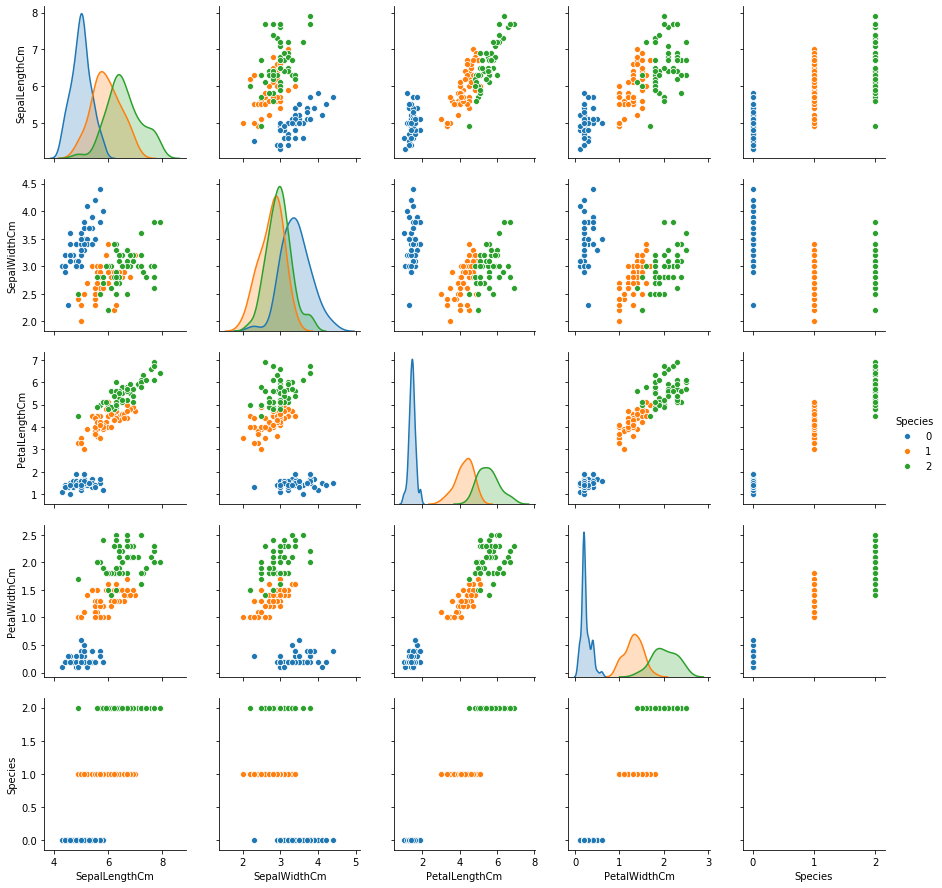

In [9]:
seaborn.pairplot(df.iloc[:,1:6], hue='Species')

In [10]:
def eucledian_dist(x1, x2):
    dist = np.sqrt(np.sum((x1-x2)**2))
    return dist

In [11]:
from scipy.stats import mode

In [12]:
def predict(x_train, y_train, x_input, k):
    op_labels = []
    for item in x_input:
        distances = []
        for i in x_train:
            distance = eucledian_dist(i, item)
            distances.append(distance)
        distances = np.array(distances)
        dist_sortindex = np.argsort(distances)[:k]
        labels = y_train[dist_sortindex]
        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)
        
    return np.array(op_labels)

In [13]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = predict(x_train, y_train, x_test, 7)

In [24]:
y_test, y_pred

(array([0., 2., 0., 2., 0., 2., 0., 0., 0., 1., 1., 2., 0., 1., 0., 1., 2.,
        1., 0., 0., 2., 1., 0., 2., 1., 2., 1., 1., 0., 2.]),
 array([0., 2., 0., 2., 0., 2., 0., 0., 0., 1., 1., 2., 0., 1., 0., 1., 2.,
        1., 0., 0., 2., 1., 0., 2., 1., 2., 1., 1., 0., 1.]))

In [25]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]], dtype=int64)